<a href="https://colab.research.google.com/github/jmins33/Seaborn/blob/master/seaborn_tutorial/seaborn_tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting with categorical data
- There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

- Categorical scatterplots:
 + stripplot() (with kind="strip"; the default)
 + swarmplot() (with kind="swarm")

- Categorical distribution plots:

 + boxplot() (with kind="box")
 + violinplot() (with kind="violin")
 + boxenplot() (with kind="boxen")

- Categorical estimate plots:

 + pointplot() (with kind="point")
 + barplot() (with kind="bar")
 + countplot() (with kind="count")

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Categorical scatterplots
- There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. 
- The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”

In [2]:
import numpy as np
import pandas as pd

In [3]:
drink = pd.read_table('http://bit.ly/drinksbycountry', sep=',')
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


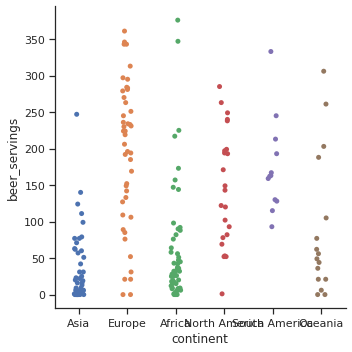

In [4]:
sns.catplot(x='continent', y='beer_servings', data=drink)

- The jitter parameter controls the magnitude of jitter or disables it altogether.

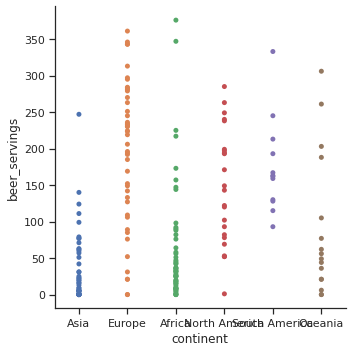

In [5]:
sns.catplot(x='continent', y='beer_servings', jitter=False, data=drink)

- This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by swarmplot(), which is activated by setting kind="swarm" in catplot()

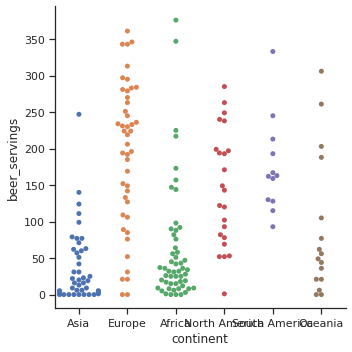

In [6]:
sns.catplot(x='continent', y='beer_servings', kind='swarm', data=drink)

- Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic.

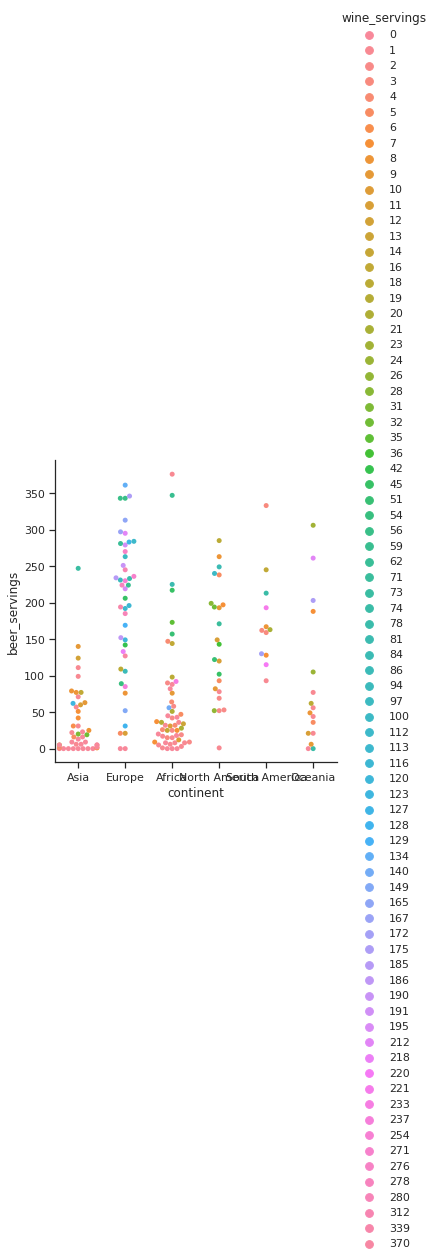

In [8]:
sns.catplot(x='continent', y='beer_servings',hue='wine_servings', kind='swarm', data=drink)

- 숫자 데이터와 달리, 범주형 변수의 수준을 축을 따라 정렬하는 방법이 항상 명확한 것은 아니다.
- 데이터에 pandas Categorical datatype 유형이 있는 경우 범주의 기본 순서를 설정할 수 있다. 범주형 축에 전달된 변수가 숫자로 보이면 수준이 정렬된다.

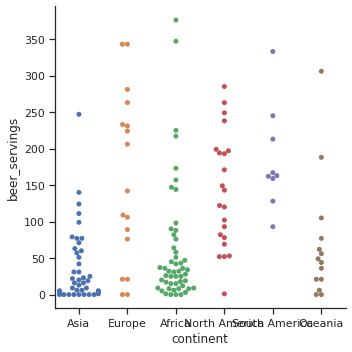

In [9]:
sns.catplot(x='continent', y='beer_servings', kind='swarm', data=drink.query('wine_servings<100'))

- The other option for choosing a default ordering is to take the levels of the category as they appear in the dataset. The ordering can also be controlled on a plot-specific basis using the order parameter.

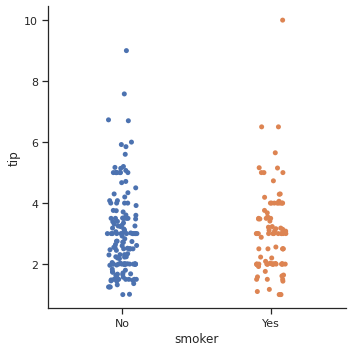

In [10]:
tips = sns.load_dataset("tips")
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)

- it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories).

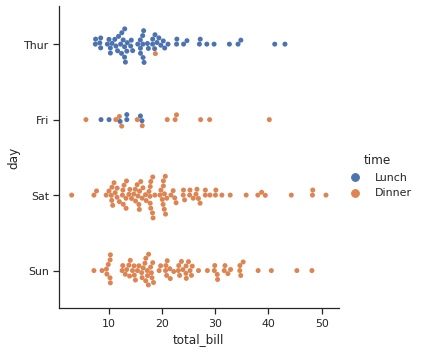

In [12]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

# Distributions of observations within categories
- As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. 
- When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.


## Boxplots
The first is the familiar boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. Each value in the boxplot corresponds to an actual observation in the data.


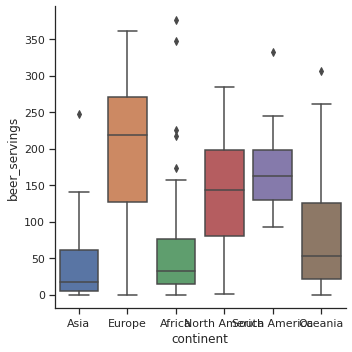

In [13]:
sns.catplot(x="continent", y="beer_servings", kind="box", data=drink)

- When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap.

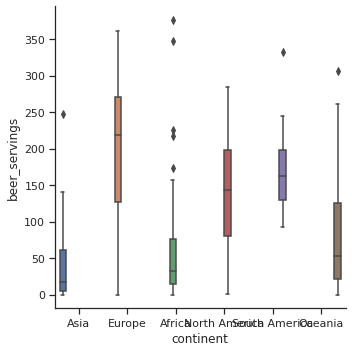

In [19]:
sns.catplot(x="continent", y="beer_servings",hue='continent', kind="box", data=drink)

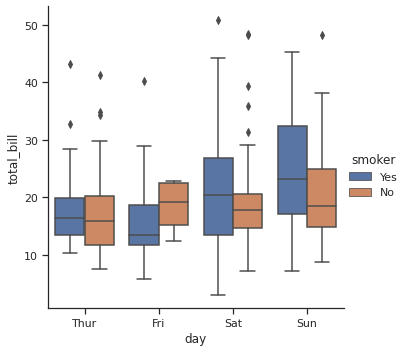

In [20]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

- This behavior is called “dodging” and is turned on by default because it is assumed that the semantic variable is nested within the main categorical variable. If that’s not the case, you can disable the dodging.

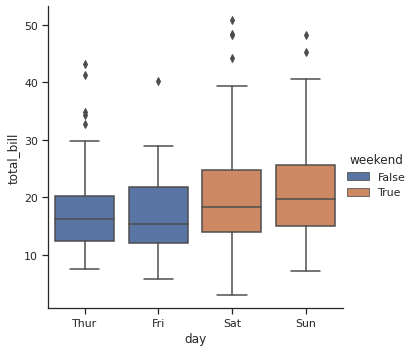

In [21]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

- boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets.

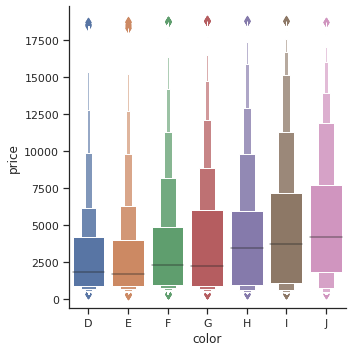

In [22]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"))

## Violinplots
- A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial

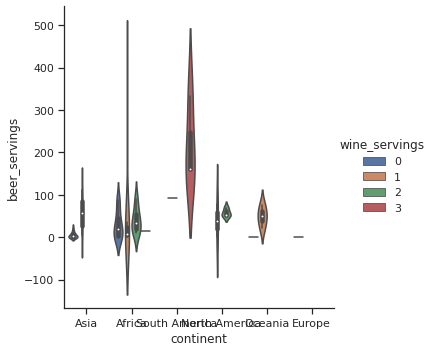

In [31]:
sns.catplot(x='continent', y='beer_servings', hue='wine_servings', kind='violin', data=drink.query('wine_servings<4'))

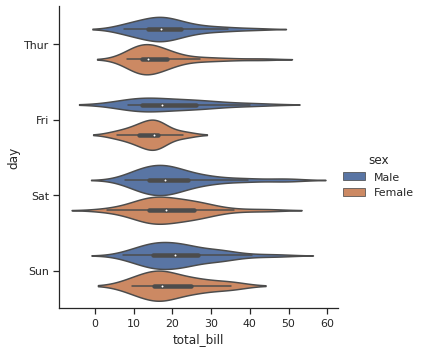

In [25]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips)

- The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot.
- bw{‘scott’, ‘silverman’, float}, optional
 + Either the name of a reference rule or the scale factor to use when computing the kernel bandwidth. The actual kernel size will be determined by multiplying the scale factor by the standard deviation of the data within each bin. 굴곡의 정도

- cut : float, optional
 + Distance, in units of bandwidth size, to extend the density past the extreme datapoints. Set to 0 to limit the violin range within the range of the observed data (i.e., to have the same effect as trim=True in ggplot.

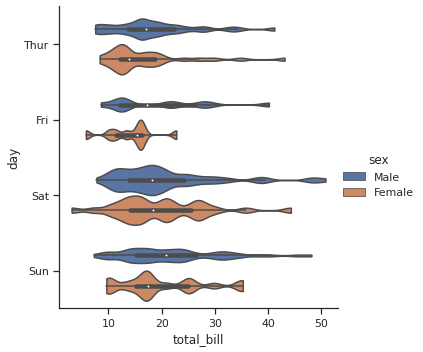

In [32]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips)

- It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space.
-hue에 2가지 변수밖에 없으면, split 가능.

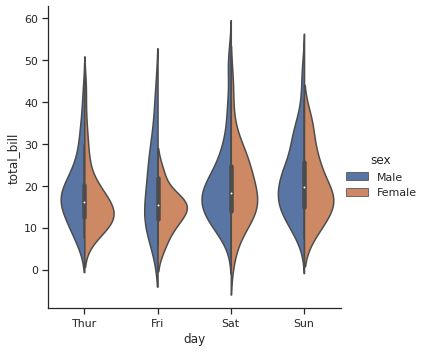

In [40]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips)

- Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values.
- inner{“box”, “quartile”, “point”, “stick”, None}, optional
 + Representation of the datapoints in the violin interior. If box, draw a miniature boxplot. If quartiles, draw the quartiles of the distribution. If point or stick, show each underlying datapoint. Using None will draw unadorned violins.

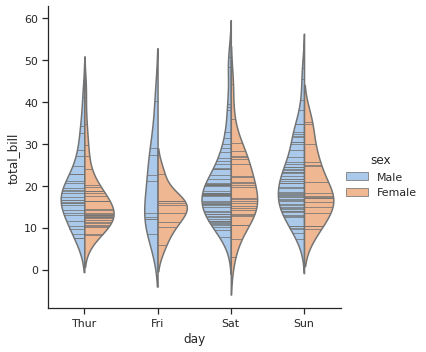

In [41]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips)

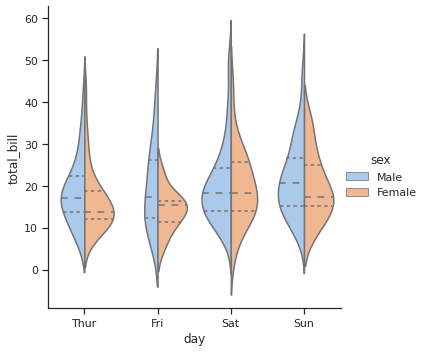

In [44]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="quartile", split=True,
            palette="pastel", data=tips)

- It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution.

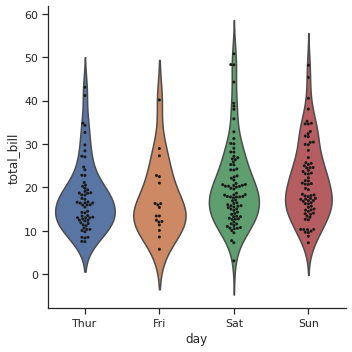

In [45]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips)

# Statistical estimation within categories
- 다른 응용 프로그램의 경우 각 범주 내 분포를 표시하는 대신 값의 중심 경향에 대한 추정치를 표시할 수 있다. Seaborn은 이 정보를 보여주는 두 가지 주요한 방법을 가지고 있다.

## Bar plots
- A familiar style of plot that accomplishes this goal is a bar plot. 
- 전체 데이터 집합에서 작동하며 함수를 적용하여 추정치를 얻는다(기본적으로 평균을 취함). 각 범주에 관측치가 여러 개 있을 경우 부트스트래핑을 사용하여 추정치 주위의 신뢰 구간을 계산하며, 이 구간은 오류 막대를 사용하여 다음과 같이 표시된다.

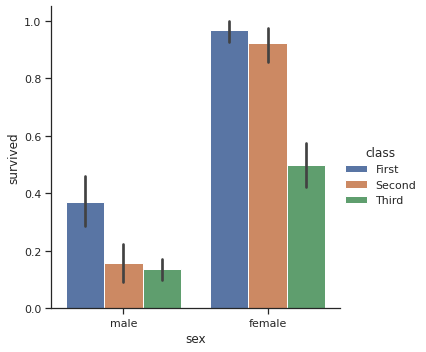

In [46]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

- when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function.

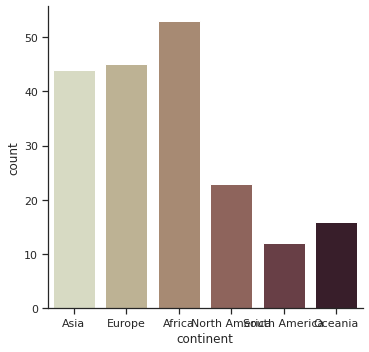

In [50]:
sns.catplot(x="continent", kind="count", palette="ch:.5", data=drink)

- Both barplot() and countplot() can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function.

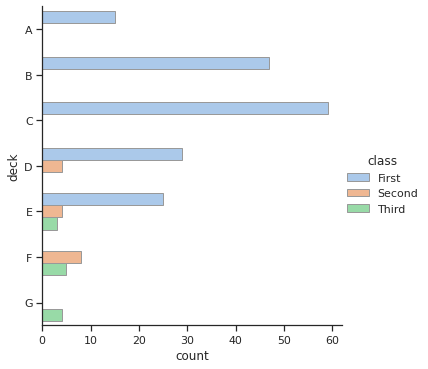

In [57]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic)

## Point plots
- An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval.
- 주된 관계가 어떻게 변화하고 있는지를 쉽게 볼 수 있게 한다.

In [ ]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

- categorical functions는 relational functions의 스타일 의미성이 부족하지만, 색조와 함께 표식어 및/또는 라인스타일을 변경하여 최대한 접근 가능하고 흑백으로 잘 재현된다.
- markersstring or list of strings, optional
 + Markers to use for each of the hue levels.

- linestylesstring or list of strings, optional
 + Line styles to use for each of the hue levels.

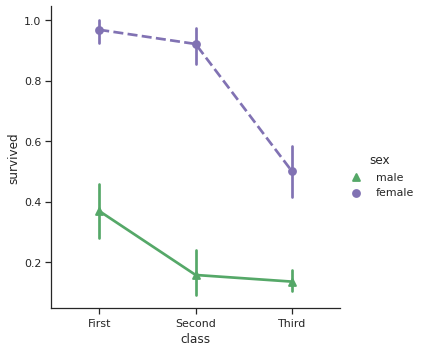

In [58]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic)

## Plotting “wide-form” data
-  DataFrames 또는 2차원 Numpy 어레이를 포함한 다양한 형식의 "와이드 폼" 데이터에도 적용할 수 있다. 이러한 개체는 데이터 매개 변수에 직접 전달되어야 한다.


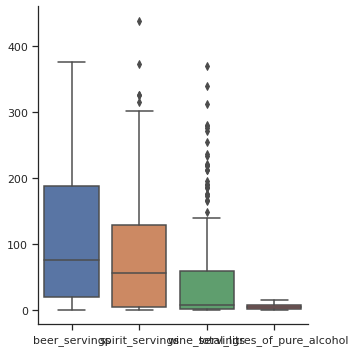

In [59]:
sns.catplot(data=drink, orient="continent", kind="box")

- Additionally, the axes-level functions accept vectors of Pandas or numpy objects rather than variables in a DataFrame:

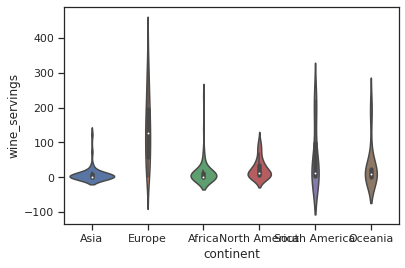

In [60]:
sns.violinplot(x=drink.continent, y=drink.wine_servings)

- To control the size and shape of plots made by the functions discussed above, you must set up the figure yourself using matplotlib commands.
- This is the approach you should take when you need a categorical figure to happily coexist in a more complex figure with other kinds of plots.

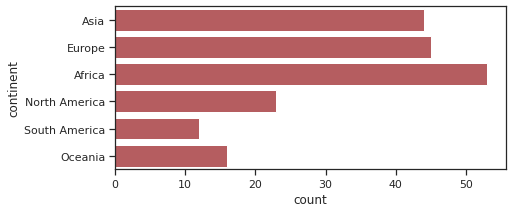

In [61]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="continent", data=drink, color="r")

# Showing multiple relationships with facets
- relplot()과 마찬가지로 catplot()이 페이싯그리드(FacetGrid) 위에 구축된다는 사실은 보다 고차원적인 관계를 시각화하기 위해 페이싱 변수를 추가하기 쉽다는 것을 의미한다.


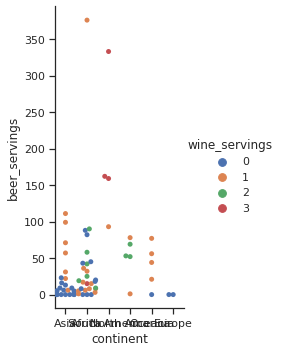

In [64]:
sns.catplot(x='continent', y='beer_servings', hue='wine_servings',
            aspect=.6, kind='swarm', data=drink.query('wine_servings<4'))

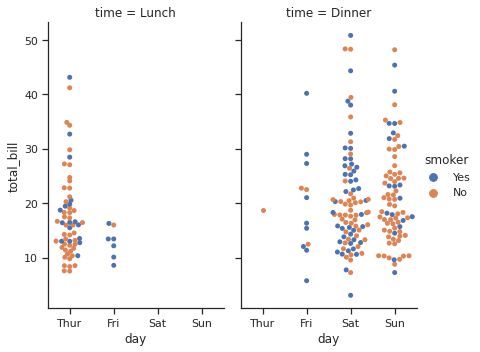

In [62]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)

- 그림을 추가로 사용자 지정하려면 그림에서 반환되는 FacetGrid 개체에서 다음 방법을 사용하십시오.

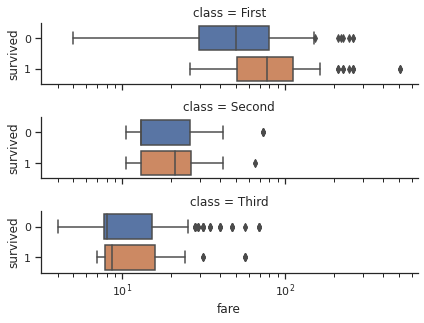

In [63]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")

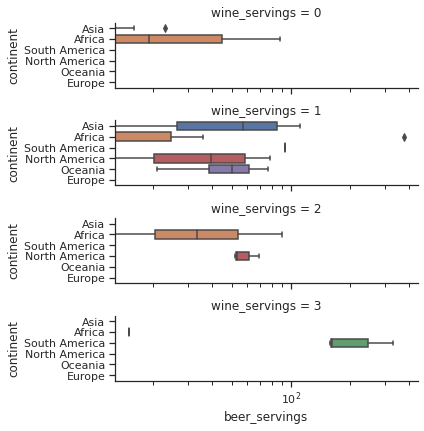

In [66]:
gg = sns.catplot(x="beer_servings", y="continent", row="wine_servings",
                kind="box", orient="h", height=1.5, aspect=4,
                data=drink.query("wine_servings < 4"))
gg.set(xscale="log")